###IMPORTS

---





In [42]:
import re

import nltk

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from bs4 import BeautifulSoup

import tensorflow as tf
from tensorflow.keras import layers
import tensorflow_datasets as tfds

from sklearn.model_selection import train_test_split

###DATASET

---



In [2]:
columns = ["sentiment", "id", "date", "query", "user", "tweet"]

dataset = pd.read_csv('data.csv', 
                      header=None,
                      names=columns,
                      engine="python",
                      encoding="latin1",
                      error_bad_lines=False)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
# remove unneccessary columns
dataset.drop(["id", "date", "query", "user"],
          axis=1,
          inplace=True)

In [4]:
dataset.head()

,sentiment,tweet
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [5]:
dataset["sentiment"].unique()

array([0, 4, 2])

In [6]:
# neutral sentiment - not needed (for now)
dataset.loc[dataset["sentiment"] == 2]

,sentiment,tweet
1600009,2,Check this video out -- President Obama at the...
1600029,2,need suggestions for a good IR filter for my c...
1600030,2,@surfit: I just checked my google for my busin...
1600044,2,is in San Francisco at Bay to Breakers.
1600045,2,just landed at San Francisco
...,...,...
1600474,2,has a date with bobby flay and gut fieri from ...
1600482,2,How to Track Iran with Social Media: http://bi...
1600485,2,Twitter Stock buzz: $AAPL $ES_F $SPY $SPX $PAL...
1600487,2,@johncmayer is Bobby Flay joining you?


In [7]:
dataset.drop(dataset.loc[dataset["sentiment"]==2].index, inplace=True)

In [8]:
# change labels
data_labels = dataset["sentiment"].values
data_labels[data_labels == 4] = 1

In [9]:
dataset["sentiment"].unique()

array([0, 1])

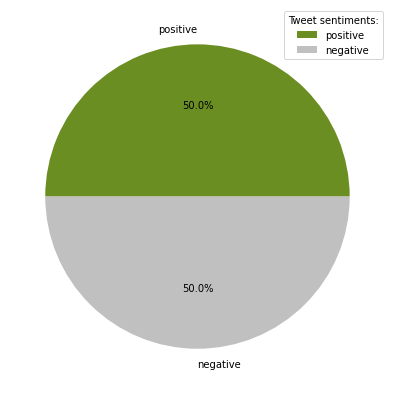

In [10]:
# sentiment distribution in the dataset
labels = ["positive", "negative"]
colors = ["olivedrab", "silver"]

plt.figure(figsize=(7,7))
plt.pie(dataset["sentiment"].value_counts(), labels=labels, colors=colors, autopct="%1.1f%%")
plt.legend(title = "Tweet sentiments:")
plt.show()

###DATA PREPROCESSING

---



PUNCTUATION AND OTHER JUNK

---



In [14]:
def clean_text(tweet):
    # removes additional xml info
    tweet = BeautifulSoup(tweet, "lxml").get_text()
    # removes all the tags @name
    tweet = re.sub(r"@[A-Za-z0-9]+", ' ', tweet)
    # removes hyperlinks
    tweet = re.sub(r"https?://[A-Za-z0-9./]+", ' ', tweet)
    # removes punctuation, except '
    tweet = re.sub(r"[^a-zA-Z']", ' ', tweet)
    # removes double whitespaces
    tweet = re.sub(r" +", ' ', tweet)
    # lower-case all
    tweet = tweet.lower()
  
    return tweet

In [15]:
data_clean = [clean_text(tweet) for tweet in dataset['tweet']]

In [33]:
data_clean[:15]

[" awww that's a bummer you shoulda got david carr of third day to do it d",
 "is upset that he can't update his facebook by texting it and might cry as a result school today also blah ",
 ' i dived many times for the ball managed to save the rest go out of bounds',
 'my whole body feels itchy and like its on fire ',
 " no it's not behaving at all i'm mad why am i here because i can't see you all over there ",
 ' not the whole crew ',
 'need a hug ',
 " hey long time no see yes rains a bit only a bit lol i'm fine thanks how's you ",
 " k nope they didn't have it ",
 ' que me muera ',
 "spring break in plain city it's snowing ",
 'i just re pierced my ears ',
 " i couldn't bear to watch it and i thought the ua loss was embarrassing ",
 ' it it counts idk why i did either you never talk to me anymore ',
 " i would've been the first but i didn't have a gun not really though zac snyder's just a doucheclown "]

LEMMATIZATION & STOP WORD REMOVAL

---



In [22]:
# https://aclanthology.org/W18-5406.pdf
# decided not to lemmatize, only remove stop words for dimensionality reduction

In [58]:
nltk.download('stopwords')

all_stopwords = stopwords.words('english')
all_stopwords.remove('not')

def remove_stopwords(data):
    tokens = data.split()
    tokens = [word for word in tokens if not word in set(all_stopwords)]
    tokens = ' '.join(tokens)
    return tokens

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [59]:
corpus = [remove_stopwords(tweet) for tweet in data_clean]

In [63]:
corpus[:15]

["awww that's bummer shoulda got david carr third day",
 "upset can't update facebook texting might cry result school today also blah",
 'dived many times ball managed save rest go bounds',
 'whole body feels itchy like fire',
 "not behaving i'm mad can't see",
 'not whole crew',
 'need hug',
 "hey long time see yes rains bit bit lol i'm fine thanks how's",
 'k nope',
 'que muera',
 'spring break plain city snowing',
 'pierced ears',
 'bear watch thought ua loss embarrassing',
 'counts idk either never talk anymore',
 "would've first gun not really though zac snyder's doucheclown"]

EMBEDDING

---



In [44]:
# EMBEDDING
# tokenizer = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(corpus, target_vocab_size=2**16)

# embedded_data = [tokenizer.encode(sentence) for sentence in corpus]

KeyboardInterrupt: ignored

PADDING

---



In [ ]:
# max_length = max([len(tweet) for tweet in embedded_data])

# padded_data = tf.keras.preprocessing.sequence.pad_sequences(embedded_data,
#                                                             value=0,
#                                                             padding="post",
#                                                             maxlen=max_length)

###TRAIN/TEST/VALIDATION SPLIT

---



In [ ]:
# X = dataset["tweet"]
# y = dataset["sentiment"]

# X_train, X_remaining, y_train, y_remaining = train_test_split(X, y, test_size = 0.2, random_state = 5)

In [ ]:
# X_valid, X_test, y_valid, y_test = train_test_split(X_remaining, y_remaining, test_size = 0.5, random_state = 5)

### SIMPLE NAIVE BAYES

MODEL CONFIGURATION

---



MODEL TRAINING

---



MODEL EVALUATION

---



NEW PREDICTIONS

---



### CONVOLUTIONAL NEURAL NETWORK

MODEL CONFIGURATION

---



MODEL TRAINING

---



MODEL EVALUATION

---



NEW PREDICTIONS

---



### RECURRENT NEURAL NETWORK

MODEL CONFIGURATION

---



MODEL TRAINING

---



MODEL EVALUATION

---



NEW PREDICTIONS

---

